# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**
* The dataset contains multiple folders, each corresponding to a specific class such as Cardboard, Food_Waste, and Metal.
* Inside each folder, there are images of objects that belong to that category.
* The items within each class are not further subcategorized.
* For example, the Food_Waste folder may include images of coffee grounds, teabags, and fruit peels, but these are not individually labeled as such.


## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



Load the dataset.

In [3]:
# Load and unzip the dataset

from google.colab import drive
drive.mount('/content/drive')
# Unzip the dataset
import zipfile
zip_path = '/content/drive/My Drive/data.zip'  # Update if needed
extract_path = '/content/dataset/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
# Load and preprocess images
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



Mounted at /content/drive


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images
def load_images_and_labels(data_dir):
    images, labels = [], []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                label = os.path.basename(root)  # Use folder name as label
                try:
                    img = Image.open(img_path).convert('RGB')
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return images, labels





#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [5]:
# Get the images and their labels

images, labels = load_images_and_labels(extract_path)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

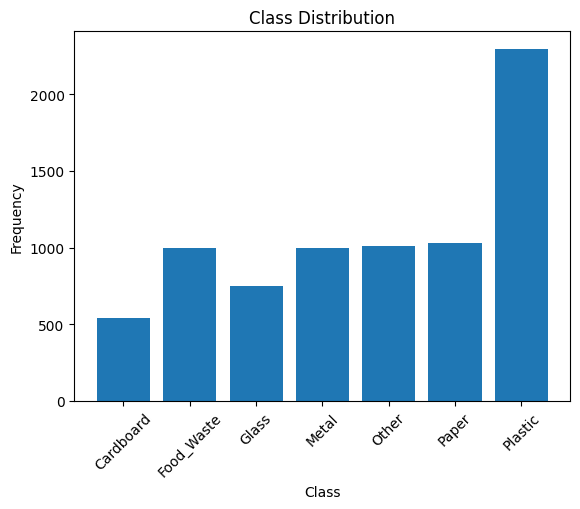

In [6]:
# Visualise Data Distribution

def plot_class_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(labels)


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

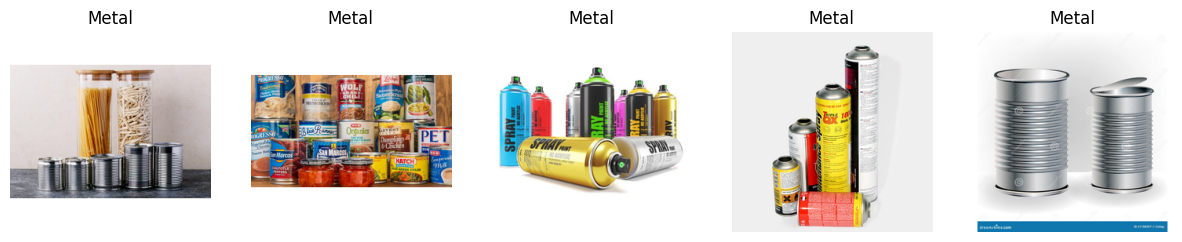

In [7]:
# Visualise Sample Images (across different labels)
def visualize_sample_images(images, labels, num_samples=5):
    num_available_samples = min(num_samples, len(images))
    plt.figure(figsize=(15, 5))
    for i in range(num_available_samples):
        plt.subplot(1, num_available_samples, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

visualize_sample_images(images, labels)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [8]:
# Find the smallest and largest image dimensions from the data set
min_width = min(img.shape[1] for img in images)
min_height = min(img.shape[0] for img in images)
target_size = (min_height, min_width)

def resize_images(images, target_size):
    resized = []
    for img in images:
        img = Image.fromarray(img).resize(target_size)
        resized.append(np.array(img))
    return resized




In [9]:
# Resize the image dimensions

resized_images = resize_images(images, target_size)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)



### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val, y_train, y_val = train_test_split(resized_images, categorical_labels, test_size=0.2, random_state=42)

print(f"Train shape: {np.array(X_train).shape}, Labels: {np.array(y_train).shape}")
print(f"Validation shape: {np.array(X_val).shape}, Labels: {np.array(y_val).shape}")

Train shape: (6100, 256, 256, 3), Labels: (6100, 7)
Validation shape: (1525, 256, 256, 3), Labels: (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [12]:
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [13]:
# Training
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_val), np.array(y_val)))



Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - accuracy: 0.2484 - loss: 474.3577 - val_accuracy: 0.3449 - val_loss: 1.8377
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3625 - loss: 1.7615 - val_accuracy: 0.3777 - val_loss: 1.7770
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.4649 - loss: 1.5009 - val_accuracy: 0.4085 - val_loss: 1.8262
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5627 - loss: 1.2304 - val_accuracy: 0.4210 - val_loss: 2.0526
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6203 - loss: 1.1317 - val_accuracy: 0.4341 - val_loss: 2.2539
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7035 - loss: 0.8785 - val_accuracy: 0.4420 - val_loss: 2.4023
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7430 - loss: 0.8078 - val_accuracy: 0.4570 - val_loss: 3.3152
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7802 - loss: 0.6934 - v

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [14]:
# Evaluate on the test set; display suitable metrics

loss, accuracy = model.evaluate(np.array(X_val), np.array(y_val))
print(f"Validation Accuracy: {accuracy:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4662 - loss: 3.3038
Validation Accuracy: 0.47


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [15]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [16]:
# Create a function to augment the images

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=20,
width_shift_range=0.2,
  height_shift_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)




In [ ]:
# Create the augmented training dataset

datagen.fit(np.array(X_train))




##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
datagen.flow(np.array(X_train), np.array(y_train), batch_size=32),
epochs=30,
validation_data=(np.array(X_val), np.array(y_val)),
callbacks=[early_stop]
)


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>


#### Model Training Summary:
The model is learning well on the training data, reaching over 83% accuracy by epoch 10.
However, validation accuracy improves initially but stagnates around 50%, indicating the model isn't generalizing well to unseen data.
The training loss continues to decrease while validation loss increases, which is a classic sign of overfitting.
The very high training loss (413.13) in the first epoch suggests possible issues with model initialization, data preprocessing, or the scaling of the loss function.

Overall, the model is overfitting — it performs well on the training set but poorly on validation data, suggesting it is memorizing rather than learning general patterns.

#### Recommendations to Improve Generalization:
Add Dropout layers to reduce overfitting.
Apply data augmentation techniques like rotation, flipping, and zooming to increase dataset diversity.
Use early stopping by monitoring validation loss and stopping training when it begins to rise.
Consider using a smaller or simpler model architecture, especially if the dataset is limited.
Note: Data augmentation was not applied due to GPU limitations.